# Previous Experiment Workspace
### In our pilot experiments, we probed 0-D, 1-D, and 3-D handle positions inside our workspace.


In [16]:
import pandas as pd
import numpy as np
import pdb

import matplotlib.pyplot as plt

def xform_coords_euclidean(r,theta,phi):
    x=r*np.cos(theta)*np.sin(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(phi)
    x = .1 * x #cm
    y = .1 * y #cm
    z = .1 * z #cm
    return x,y,z


cone_location = 'C://Users//bassp//Desktop//9pt_pidiv3_cone.txt'
cone_3d_positions = pd.read_csv(cone_location)
#pdb.set_trace()
# Iterate over each row, transform into X,Y,Z
x_3, y_3, z_3 = [], [], []
for index, row in cone_3d_positions.iterrows():
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetay.1'])
    x_3.append(x)
    y_3.append(y)
    z_3.append(z)

zerod_location = 'C://Users//bassp//Desktop//0mm.txt'
zerod_positions = pd.read_csv(zerod_location)
#pdb.set_trace()
# Iterate over each row, transform into X,Y,Z
x_0, y_0, z_0 = [], [], []
for index, row in zerod_positions.iterrows():
    
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetaz'])
    x_0.append(x)
    y_0.append(y)
    z_0.append(z)

fourty_location = 'C://Users//bassp//Desktop//40mm.txt'
fourty_positions = pd.read_csv(fourty_location)
#pdb.set_trace()# Iterate over each row, transform into X,Y,Z
x_40, y_40, z_40 = [], [], []
for index, row in fourty_positions.iterrows():
    #pdb.set_trace()
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetaz'])
    x_40.append(x)
    y_40.append(y)
    z_40.append(z)
    fourty_location = 'C://Users//bassp//Desktop//40mm.txt'
twenty_location = 'C://Users//bassp//Desktop//20mm.txt'
twenty_positions = pd.read_csv(twenty_location)
#pdb.set_trace()# Iterate over each row, transform into X,Y,Z
x_20, y_20, z_20 = [], [], []
for index, row in twenty_positions.iterrows():
    #pdb.set_trace()
    x, y, z = xform_coords_euclidean(row['r'], row['thetay'], row['thetaz'])
    x_20.append(x)
    y_20.append(y)
    z_20.append(z)

Note: you may need to restart the kernel to use updated packages.


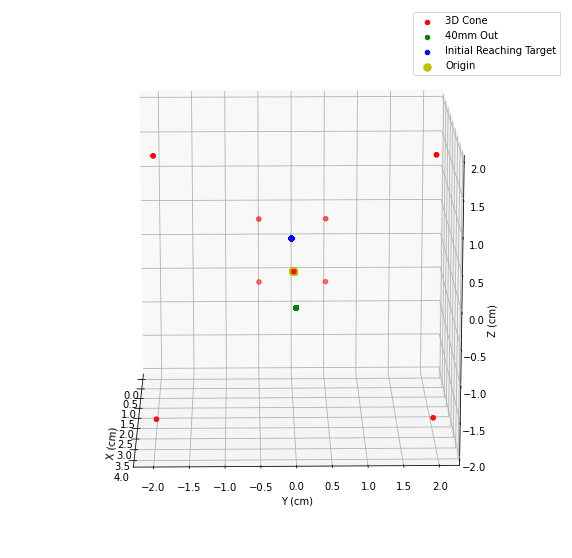

In [2]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection')
from matplotlib import animation

%pip install ffmpeg
ax.view_init(10,80)

def init():
    ax.scatter( z_3, x_3, y_3, color='r', label = '3D Cone')
    ax.scatter(z_40, x_40, y_40, color='g', label = '40mm Out')
    ax.scatter(z_0, x_0, y_0,  color='b', label = 'Initial Reaching Target')
    ax.scatter(z_20, x_20, y_20,  color='y',s=55, label = 'Origin')
    ax.set_zlabel('Z (cm)')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    return fig,

def animate(i):
    ax.view_init(elev=15., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
plt.legend()
# Save
anim.save('C://Users//bassp//Desktop//basic_animation_15.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

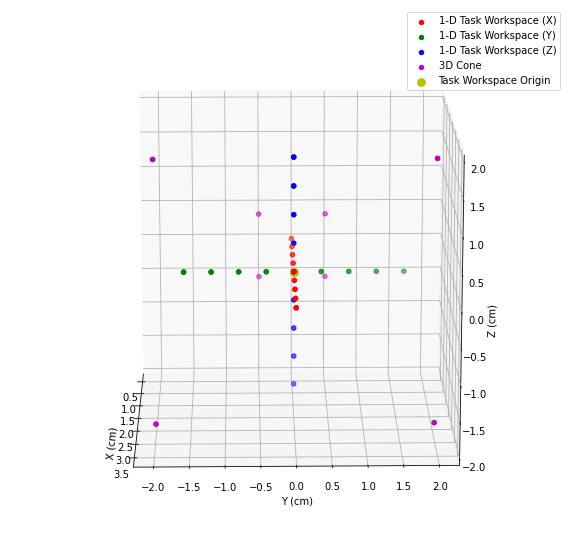

In [19]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: New Experiments')

x_dimension_positions = [0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6]
y_dimension_positions = [-1.6,-1.2,-0.8, -0.4, 0.0, 0.4, 0.8, 1.2, 1.6]
z_dimension_positions = y_dimension_positions
origin_vector = [2,2,2,2,2,2,2,2,2]
zero_vector = np.zeros(9)



def new_experiments_animation():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax1.scatter(x_dimension_positions,zero_vector, zero_vector, color='r', label = '1-D Task Workspace (X)')
    ax1.scatter(origin_vector,y_dimension_positions, zero_vector, color='g', label = '1-D Task Workspace (Y)')
    ax1.scatter(origin_vector, zero_vector,z_dimension_positions, color='b', label = '1-D Task Workspace (Z)')
    ax1.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax1.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax1.set_zlabel('Z (cm)')
    ax1.set_xlabel('X (cm)')
    ax1.set_ylabel('Y (cm)')
    return fig1, 


def animate_1(i):
    ax1.view_init(elev=15., azim=i)
    return fig1,


anim = animation.FuncAnimation(fig1, animate_1, init_func=new_experiments_animation,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('C://Users//bassp//Desktop//updated_1d_experiments_animation_15.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

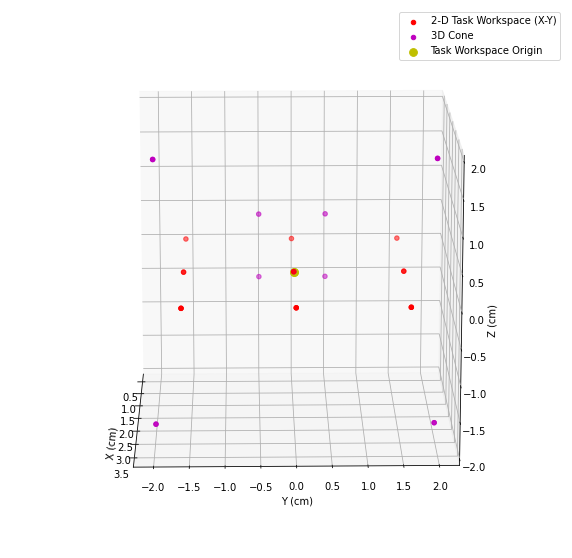

In [21]:

fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: 2-D Plane Locations')

two_d_x_xy_positions = [0.4, 0.4, 0.4, 2, 2, 2, 3.6, 3.6, 3.6]
two_d_y_xy_positions = [0, -1.6, 1.6, 0, -1.6, 1.6, 0, -1.6, 1.6]
two_d_z_positions = [0, -1.6, 1.6, 0, -1.6, 1.6, 0, -1.6, 1.6]


def new_experiments_animation_planes():
    """ Function to animate a plot of proposed experiments in 1, 2 and 3-D task space planes."""
    ax2.scatter(two_d_x_xy_positions,two_d_y_xy_positions, zero_vector, color='r', label = '2-D Task Workspace (X-Y)')
    #ax2.scatter(origin_vector,two_d_y_xy_positions,two_d_z_positions, color='g', label = '1-D Task Workspace (Y-Z)')
    #ax2.scatter(two_d_x_xy_positions, zero_vector,two_d_z_positions, color='b', label = '2-D Task Workspace (X-Z)')
    ax2.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax2.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax2.set_zlabel('Z (cm)')
    ax2.set_xlabel('X (cm)')
    ax2.set_ylabel('Y (cm)')
    return fig2, 


def animate_2(i):
    ax2.view_init(elev=15., azim=i)
    return fig2,


anim = animation.FuncAnimation(fig2, animate_2, init_func=new_experiments_animation_planes,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('C://Users//bassp//Desktop//updated_2d_experiments_animation_15_xy.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

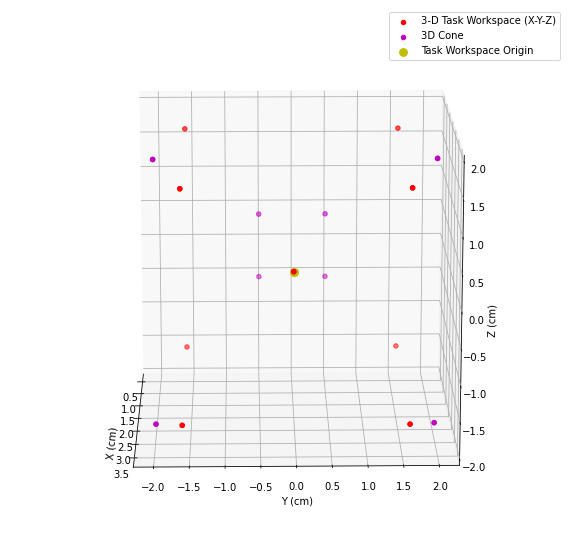

In [22]:
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(1, 1, 1, projection='3d', label='Reaching Volume Projection: 3-D Cube')

X_pos_cube = [2, 0.4, 0.4, 0.4, 0.4, 3.6, 3.6, 3.6, 3.6 ]
Y_pos_cube = [0, 1.6, 1.6, -1.6, -1.6, 1.6, 1.6, -1.6, -1.6]
Z_pos_cube = [0, 1.6, -1.6, 1.6, -1.6, 1.6, -1.6, 1.6, -1.6]

def new_experiments_animation_cube():
    ax3.scatter(X_pos_cube,Y_pos_cube, Z_pos_cube, color='r', label = '3-D Task Workspace (X-Y-Z)')
    #ax2.scatter(origin_vector,two_d_y_xy_positions,two_d_z_positions, color='g', label = '1-D Task Workspace (Y-Z)')
    #ax2.scatter(two_d_x_xy_positions, zero_vector,two_d_z_positions, color='b', label = '2-D Task Workspace (X-Z)')
    ax3.scatter( z_3, x_3, y_3, color='m', label = '3D Cone')
    ax3.scatter(2,0,0,color='y',s=60,label='Task Workspace Origin')
    ax3.set_zlabel('Z (cm)')
    ax3.set_xlabel('X (cm)')
    ax3.set_ylabel('Y (cm)')
    return fig3, 

def animate_3(i):
    ax3.view_init(elev=15., azim=i)
    return fig3,


anim = animation.FuncAnimation(fig3, animate_3, init_func=new_experiments_animation_cube,
                               frames=360, interval=20, blit=True)
plt.legend()
anim.save('C://Users//bassp//Desktop//3-D_cube_taskspace.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

In [30]:
def xform_coords_spherical(x, y, z):
    x=x*10
    y=y*10
    z=z*10
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arccos(z / r)
    if x > 0:
        phi = np.arctan(y/x)
    elif x < 0:
        phi = np.arctan(y/x) + np.pi
    elif x == 0:
        if y > 0:
            phi = np.pi/2
        if y < 0:
            phi = (-1 * np.pi) / 2
    else:
        phi = 0
    return r, theta, phi

def get_spherical_experiment_coords_from_euclidean(x_array, y_array, z_array):
    spherical_coords_array = np.zeros((3, len(x_array)))
    for i in range(0, len(x_array)):
        r, theta, phi = xform_coords_spherical(x_array[i], y_array[i], z_array[i])
        spherical_coords_array[:,i] = [r, theta, phi]
    return spherical_coords_array

x_1d_spherical = get_spherical_experiment_coords_from_euclidean(x_dimension_positions,zero_vector,zero_vector)
y_1d_spherical = get_spherical_experiment_coords_from_euclidean(origin_vector,y_dimension_positions, zero_vector)
z_1d_spherical = get_spherical_experiment_coords_from_euclidean(origin_vector, zero_vector,z_dimension_positions)

xy_2d_spherical = get_spherical_experiment_coords_from_euclidean(two_d_x_xy_positions,two_d_y_xy_positions, zero_vector)
xz_2d_spherical = get_spherical_experiment_coords_from_euclidean(two_d_x_xy_positions, zero_vector,two_d_z_positions)
yz_2d_spherical = get_spherical_experiment_coords_from_euclidean(origin_vector,two_d_y_xy_positions,two_d_z_positions)

xyz_3d_spherical = get_spherical_experiment_coords_from_euclidean(X_pos_cube,Y_pos_cube, Z_pos_cube)



In [33]:
z_1d_spherical

array([[25.61249695, 23.32380758, 21.54065923, 20.39607805, 20.        ,
        20.39607805, 21.54065923, 23.32380758, 25.61249695],
       [ 2.24553727,  2.11121583,  1.9513027 ,  1.76819189,  1.57079633,
         1.37340077,  1.19028995,  1.03037683,  0.89605538],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])